## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)


from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


## Data Loading

In [2]:
df_0 = pd.read_csv("dataset/KDDTrain+.txt",header=None)
df= df_0.copy()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.170,0.030,0.170,0.000,0.000,0.000,0.050,0.000,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21


## Data Cleaning
We don't have the names of the features from the given dataset so we adjust the columns from : https://www.kaggle.com/code/timgoodfellow/nsl-kdd-explorations

In [3]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'label'
,'level'])

df.columns = columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [5]:
df.shape

(125973, 43)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.000,287.145,2604.515,0.000,0.000,0.000,0.000,42908.000
src_bytes,125973.000,45566.743,5870331.182,0.000,0.000,44.000,276.000,1379963888.000
dst_bytes,125973.000,19779.114,4021269.151,0.000,0.000,0.000,516.000,1309937401.000
land,125973.000,0.000,0.014,0.000,0.000,0.000,0.000,1.000
wrong_fragment,125973.000,0.023,0.254,0.000,0.000,0.000,0.000,3.000
urgent,125973.000,0.000,0.014,0.000,0.000,0.000,0.000,3.000
hot,125973.000,0.204,2.150,0.000,0.000,0.000,0.000,77.000
num_failed_logins,125973.000,0.001,0.045,0.000,0.000,0.000,0.000,5.000
logged_in,125973.000,0.396,0.489,0.000,0.000,0.000,1.000,1.000
num_compromised,125973.000,0.279,23.942,0.000,0.000,0.000,0.000,7479.000


There are some outlier values, but we will check if it's too much

## Data Pre-processing

In [7]:
# Null values
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Dataset does not contain any null values

In [8]:
# Duplicates
df.duplicated().sum()

np.int64(0)

Dataset does not contain any duplicate values

<Figure size 2000x4000 with 0 Axes>

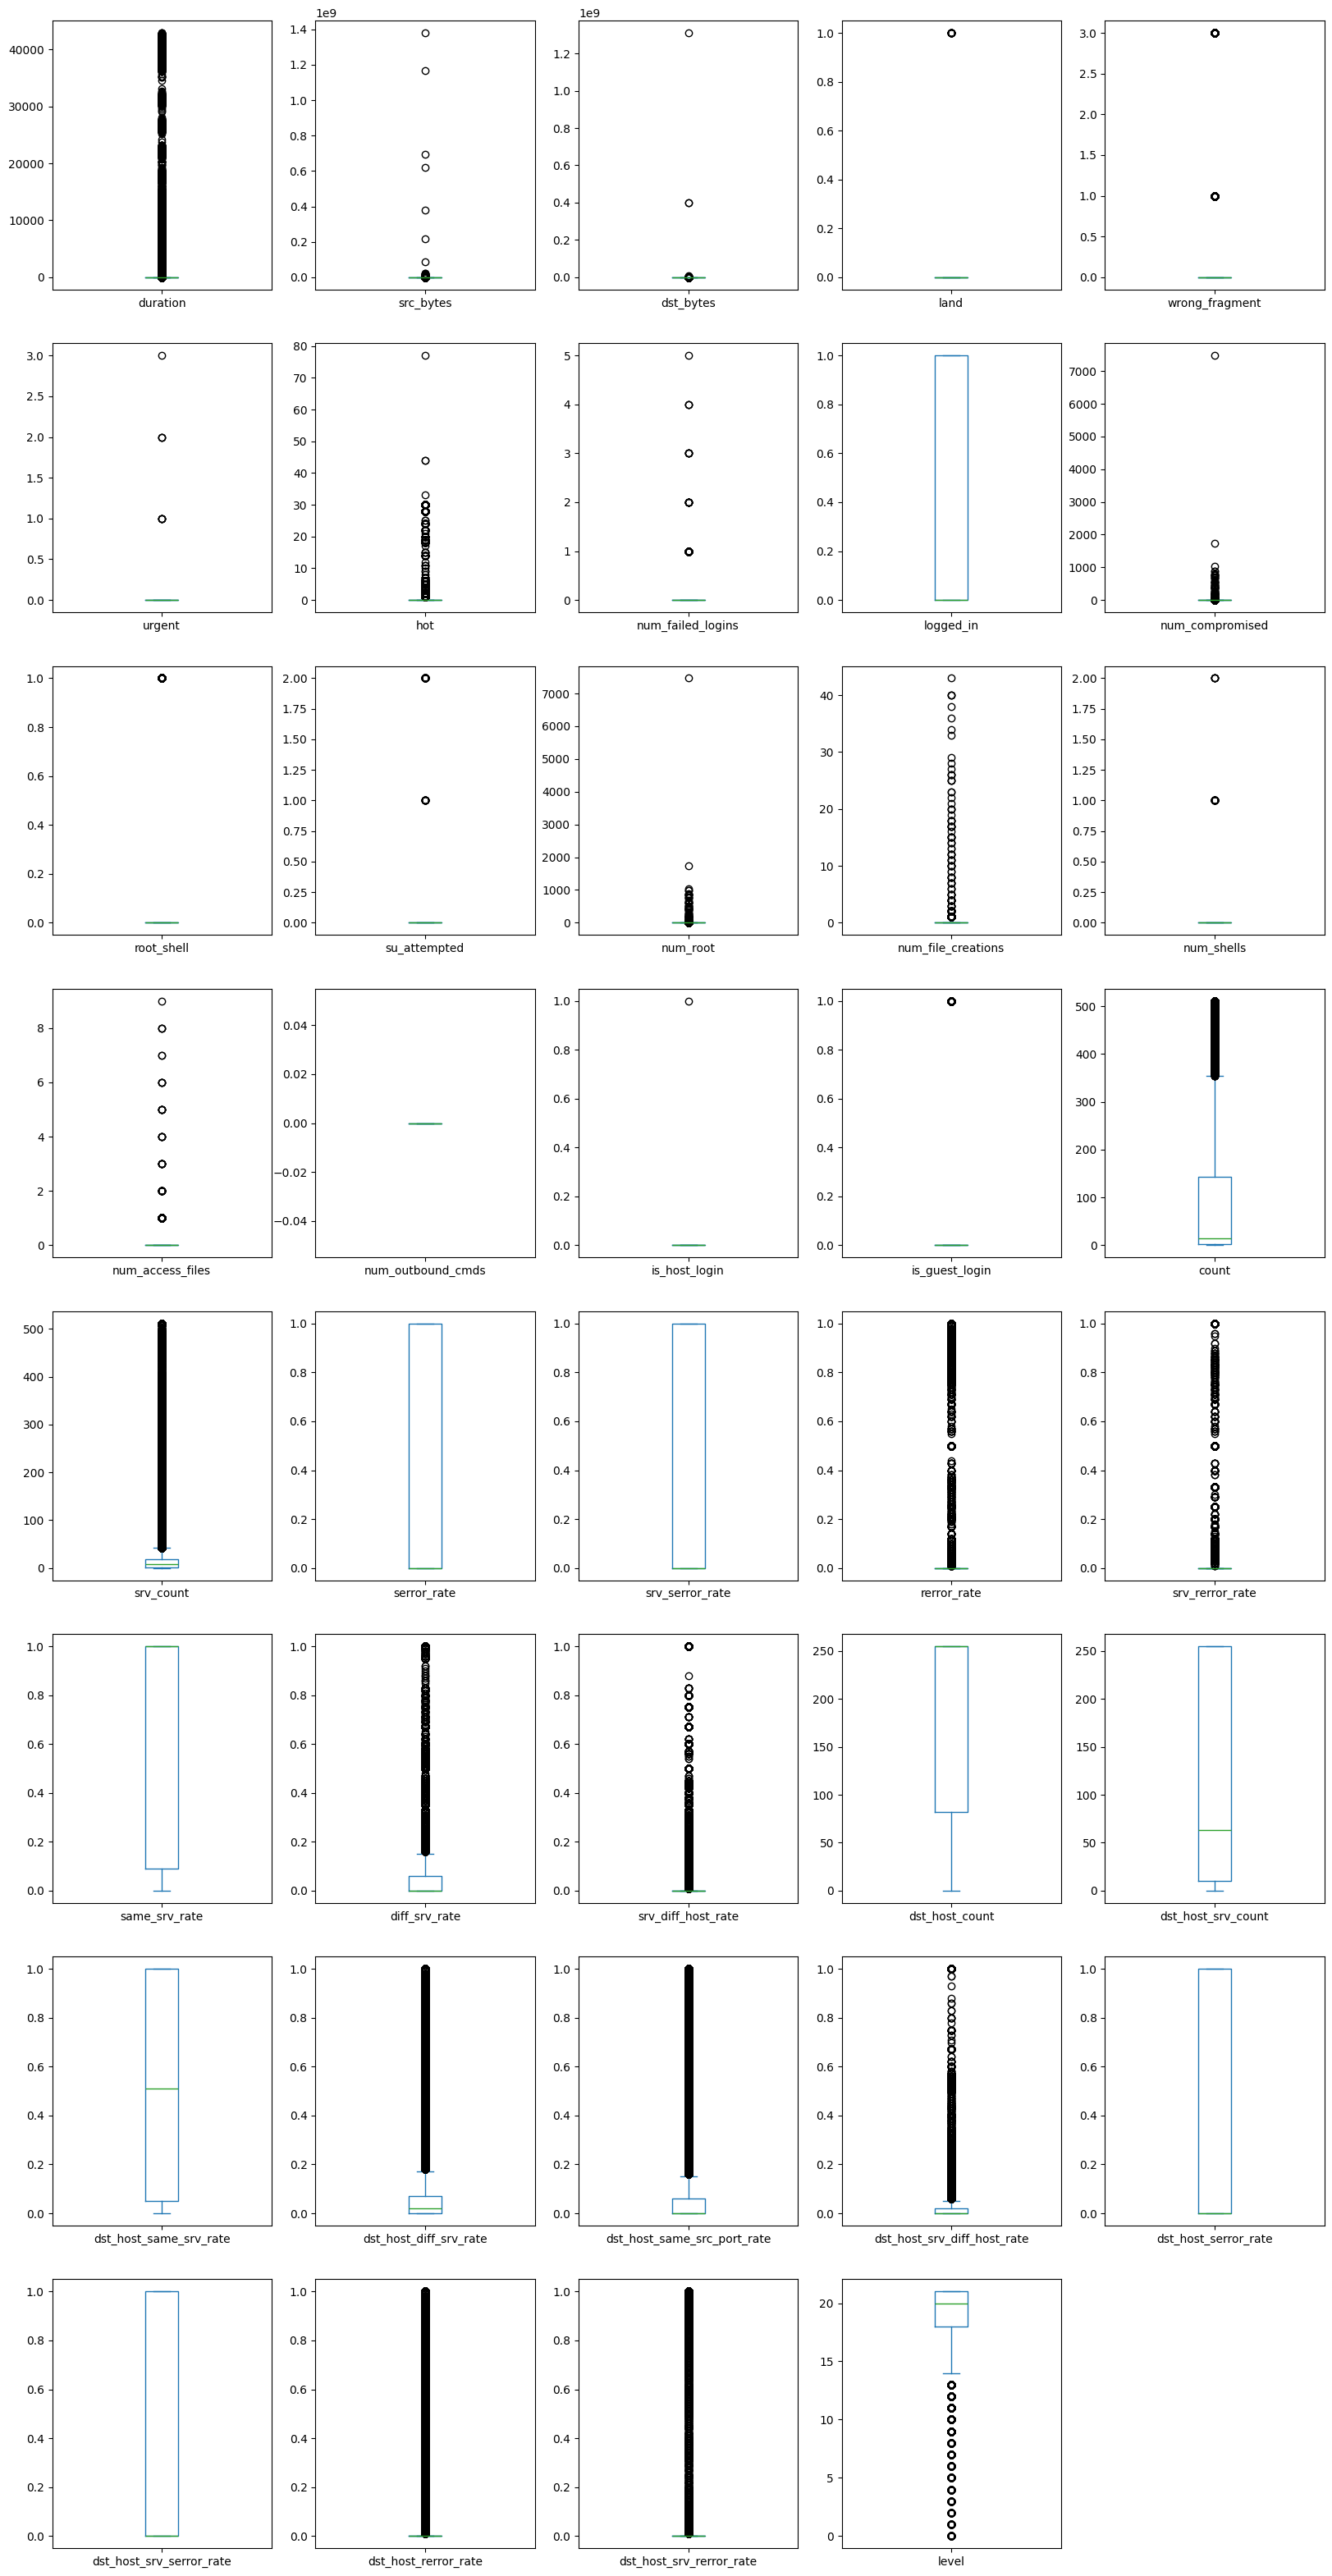

In [9]:
# Outliers
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

There is no too much outlier to misslead the model so i will not drop the outliers

In [10]:
attack_n = []
for i in df.label :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df['label'] = attack_n

In [11]:
df['label'].unique()

array(['normal', 'attack'], dtype=object)

## Data Pre-processing

In [12]:
# Binary classification
df['label'] = df['label'].apply(lambda x: 0 if x == 'normal' else 1)


In [13]:
# Encode categorical features
df = pd.get_dummies(df, columns=['protocol_type','service','flag'])


In [14]:
# Train-test split
X = df.drop(['label', 'level'], axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=42)

## Feature Engineering

In [15]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

src_bytes        0.566
dst_bytes        0.441
same_srv_rate    0.367
diff_srv_rate    0.361
flag_SF          0.343
                  ... 
service_red_i    0.000
service_tftp_u   0.000
service_telnet   0.000
flag_OTH         0.000
flag_RSTOS0      0.000
Length: 122, dtype: float64

<Axes: >

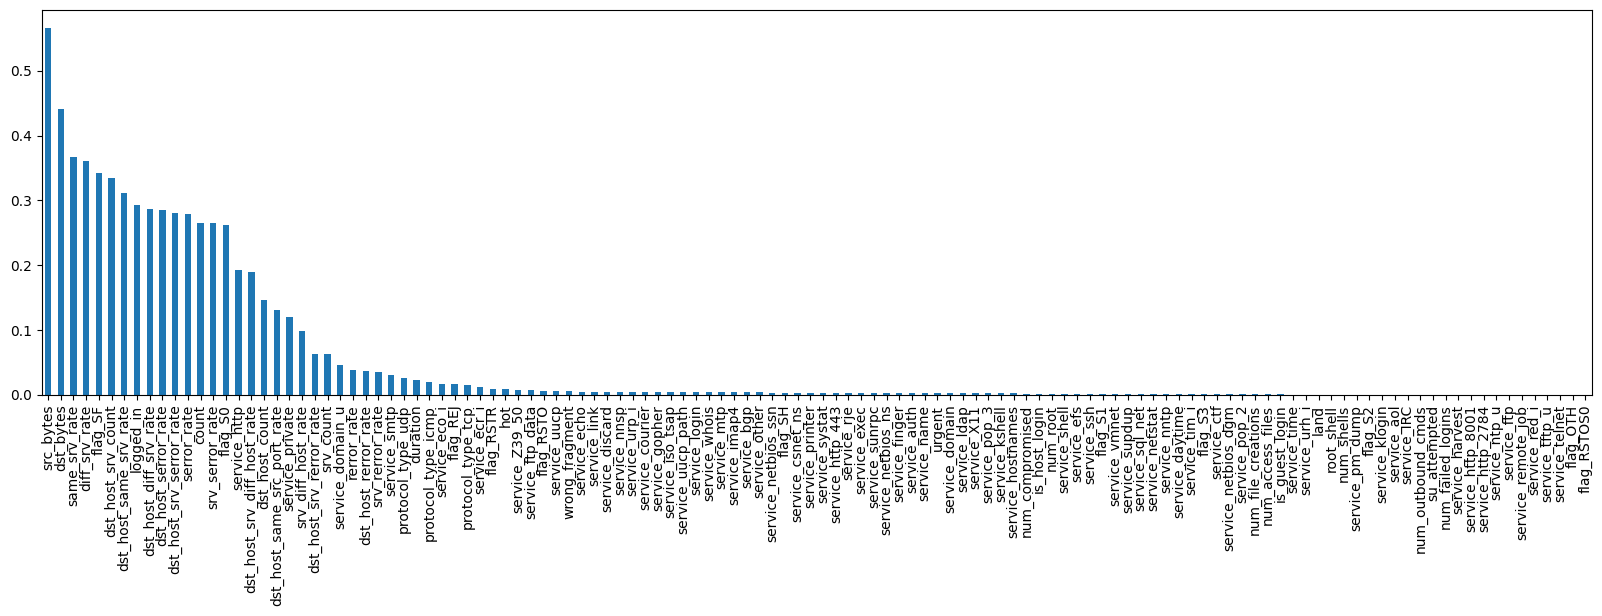

In [16]:
# Visualization
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5))

## Feature Selection

In [17]:
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
cols = X_train.columns[Select_features.get_support()]

In [18]:
cols = cols[:20]
print(cols)
#We will continue our model with these 20 features

X_train=X_train[cols]
X_test=X_test[cols]

Index(['duration', 'src_bytes', 'dst_bytes', 'logged_in', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate'],
      dtype='object')


## Scaling

In [19]:
# Scaling
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

print("X info:")
print(type(X_train_scaled))
print(X_train_scaled.dtypes)
print(X_train_scaled.head())
print(f"Shape: {X_train_scaled.shape}")
print(f"Index: {X_train_scaled.index}")

X info:
<class 'pandas.core.frame.DataFrame'>
duration                       float64
src_bytes                      float64
dst_bytes                      float64
logged_in                      float64
count                          float64
srv_count                      float64
serror_rate                    float64
srv_serror_rate                float64
rerror_rate                    float64
srv_rerror_rate                float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                 float64
dst_host_srv_count             float64
dst_host_same_srv_rate         float64
dst_host_diff_srv_rate         float64
dst_host_same_src_port_rate    float64
dst_host_srv_diff_host_rate    float64
dst_host_serror_rate           float64
dtype: object
   duration  src_bytes  dst_bytes  logged_in  count  srv_count  serror_rate  \
0    -0.092     -0.008      0.258      1.236 -0.727     -0.368       -0.638   
1 

## Noise injection and cleaning

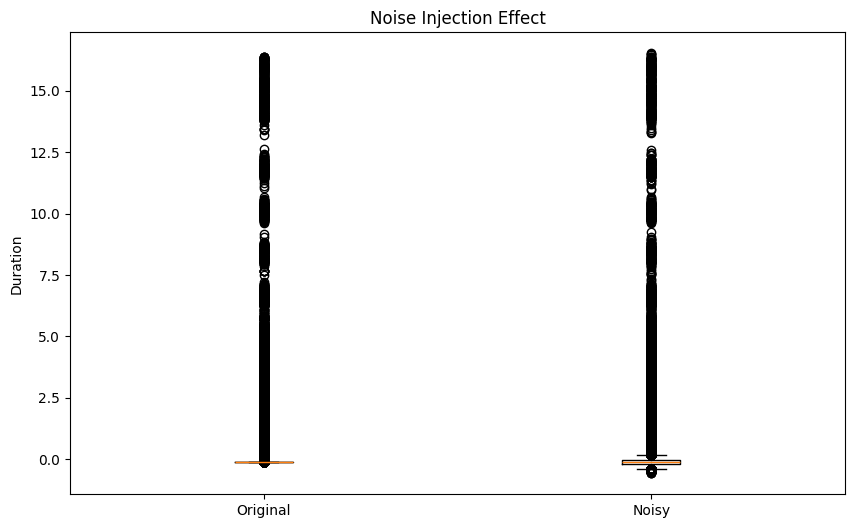

In [20]:
# Keep X as DataFrame
X_noisy = X_train_scaled.copy()
noise = np.random.normal(0, 0.1, X_noisy.shape[0])

# Use column name directly - works with pandas 3.0.0
first_col = X_noisy.columns[0]  # This is 'duration'
#X_noisy[first_col] = (X_noisy[first_col] + noise).clip(lower=0)  #clip to prevent -ve time
X_noisy[first_col] = X_noisy[first_col] + noise

# Noise cleaning using IQR
Q1 = X_noisy[first_col].quantile(0.25)
Q3 = X_noisy[first_col].quantile(0.75)
IQR = Q3 - Q1

mask = (X_noisy[first_col] >= Q1 - 1.5*IQR) & (X_noisy[first_col] <= Q3 + 1.5*IQR)
X_clean = X_noisy[mask]
y_clean = y_train.iloc[mask.values]   # keep as pandas Series

# Boxplot for pandas
plt.boxplot(
    [X_train_scaled.iloc[:, 0], X_noisy.iloc[:, 0]],
    labels=['Original', 'Noisy'])
plt.title("Noise Injection Effect")
plt.ylabel("Duration")
plt.show()

### Analysis - Noise Injection
Injecting Gaussian noise into the duration feature acts as a form of regularization, forcing the model to learn underlying trends rather than memorizing exact, potentially skewed data points. By pairing this jitter with IQR-based cleaning, you preserve the natural distribution of the data while ensuring that artificial outliers don't compromise the model's ability to generalize to new, unseen samples.

## Statistical analysis

In [21]:
stats = X_train_scaled.describe().T[['mean','std']]
stats['skewness'] = X_train_scaled.skew(numeric_only=True)
print(stats.head())


            mean   std  skewness
duration   0.000 1.000    11.924
src_bytes  0.000 1.000   181.405
dst_bytes  0.000 1.000   275.194
logged_in -0.000 1.000     0.427
count      0.000 1.000     1.508


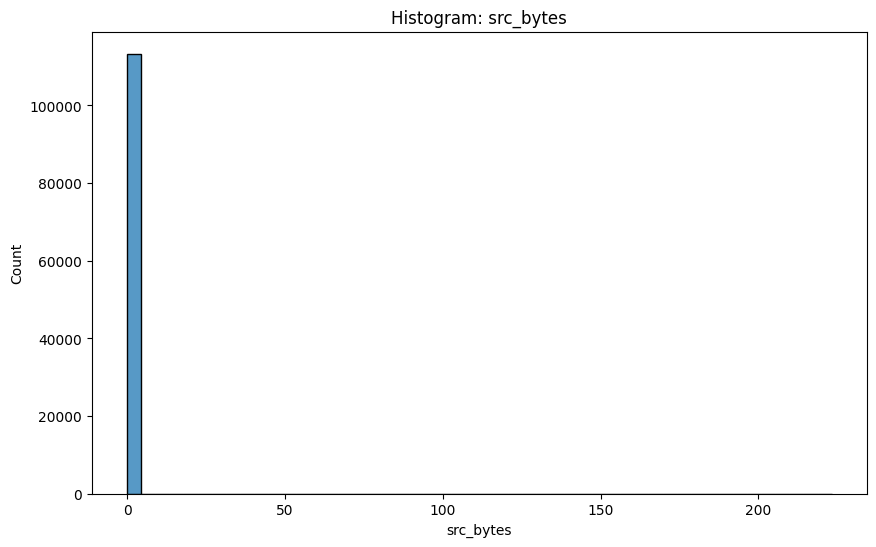

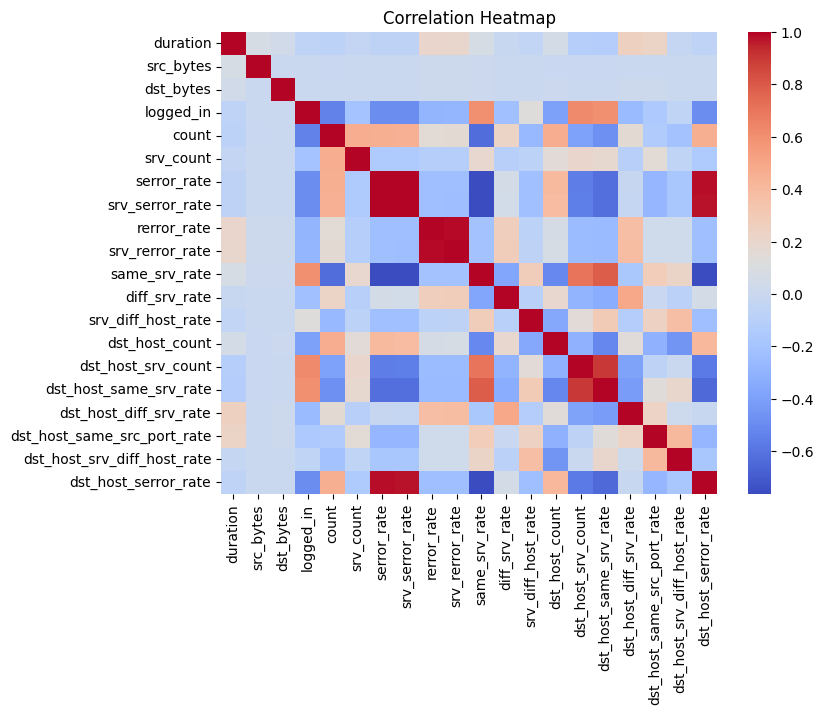

In [ ]:
sns.histplot(X_train_scaled['src_bytes'], bins=50)
plt.title("Histogram: src_bytes")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(X_train_scaled.corr(numeric_only=True), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Analysis - Statistical Analysis
The heatmap reveals strong positive correlations among service-related error rates like serror_rate and dst_host_serror_rate, indicating redundant information. Conversely, duration shows very low correlation with most features, justifying the use of noise injection on this specific column to create artificial variance without disrupting the broader relational structure of the dataset.

## Unsupervised Learning - K-Means

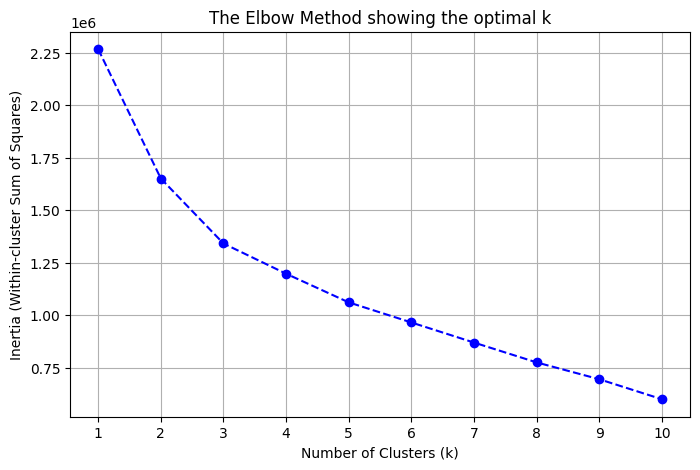

In [ ]:
# Calculate inertia for a range of k values
inertia = []
k_range = range(1, 11) # Checking 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# 2. Plot the results
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('The Elbow Method showing the optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

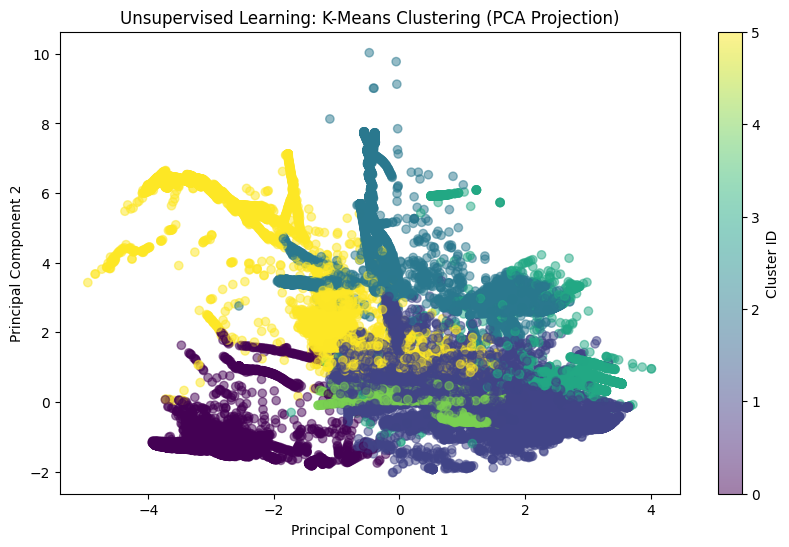


--- Cluster vs Actual Label Comparison ---
Cluster      0      1     2     3     4     5
Actual                                       
0           85  49699  2479   604  6077  1648
1        31282   3772  8390  4051  2322  2966


In [46]:
# Applying K-Means
kmeans = KMeans(n_clusters=6, random_state=42)

# Using X_train_scaled for clustering
clusters = kmeans.fit_predict(X_train_scaled)

# Visualization: PCA for 2D representation
# Having 20 features - using PCA to squash them into 2D to plot them.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 6))

# Plotting the clusters found by K-Means
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title("Unsupervised Learning: K-Means Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster ID')
plt.show()

# Interpretation
comparison_df = pd.DataFrame({'Actual': y_train, 'Cluster': clusters})
print("\n--- Cluster vs Actual Label Comparison ---")
print(pd.crosstab(comparison_df['Actual'], comparison_df['Cluster']))

In [47]:
print(f"Total Variance Explained by 2D PCA: {sum(pca.explained_variance_ratio_) * 100:.2f}%")

Total Variance Explained by 2D PCA: 46.61%


In [48]:
score = silhouette_score(X_train_scaled, clusters)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.501


### Analysis of K-means
Best output given by **clusters = 5** - composed of one **Normal* class and four **Attack* classes (DoS, Probe, R2L, U2R).

**Cluster 3** - contains only 1 normal connection and 0 attacks. This is a pure cluster that effectively isolates a very specific type of traffic.

**Cluster 1** - captures the vast majority of normal traffic 46,477, which is exactly what a good intrusion detection system should do.

**Cluster 0** - primary attack cluster, capturing 31,315 intrusions

# Supervised Learning - Random Forest

Accuracy: 0.9982536910620733
Precision: 0.9988011645829765
Recall: 0.9974345818368394
F1: 0.9981174054424097


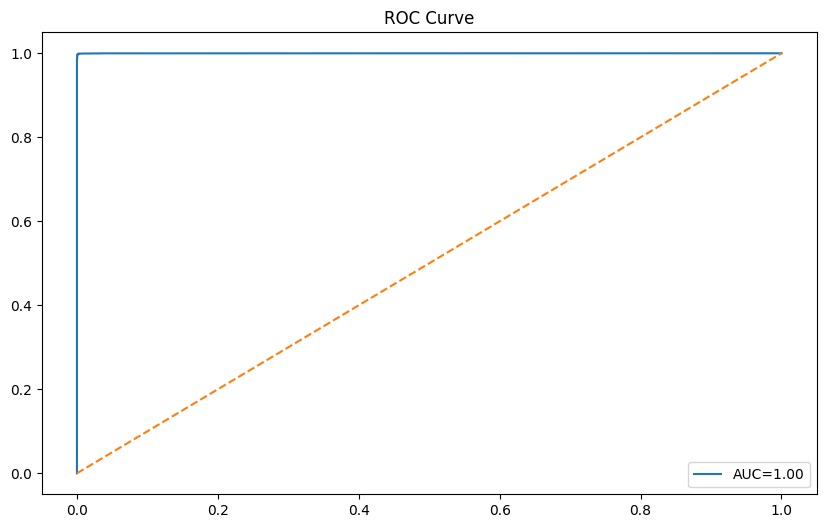

In [ ]:
## Random Forest

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:,1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", re call_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


# Confusion Metrics
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC={roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.legend()
plt.title("ROC Curve")
plt.show()

Accuracy: 0.9987299571360534
Precision: 0.9993149511902724
Recall: 0.9979476654694716
F1: 0.9986308403217525


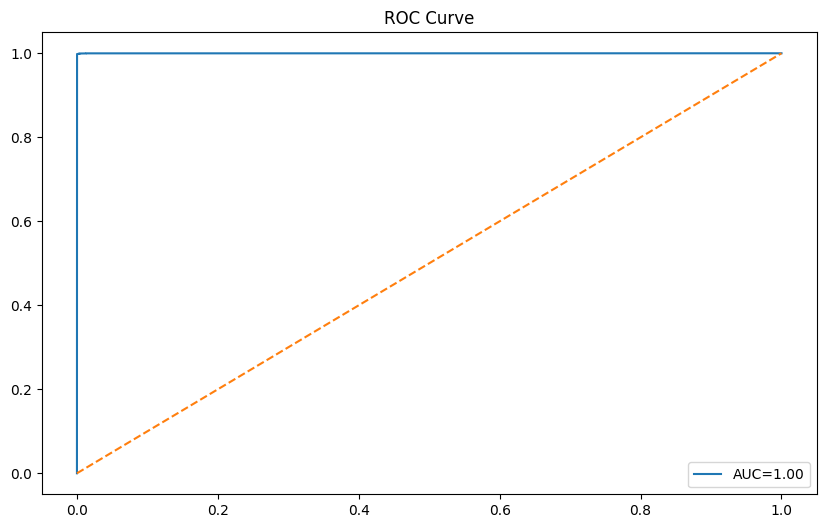

In [ ]:
# XGBoost
XGBoost_model = XGBClassifier(random_state = 42)
XGBoost_model.fit(X_train_scaled,y_train)
y_pred_xgb = XGBoost_model.predict(X_test_scaled)
y_prob_xgb = XGBoost_model.predict_proba(X_test_scaled)[:,1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1:", f1_score(y_test, y_pred_xgb))

# Confusion Metrics
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.plot(fpr_xgb, tpr_xgb, label=f"AUC={roc_auc_xgb:.2f}")
plt.plot([0,1],[0,1],'--')
plt.legend()
plt.title("ROC Curve")
plt.show()

Accuracy: 0.9333227496428005
Precision: 0.9372925764192139
Recall: 0.917735590901317
F1: 0.9274109920497753


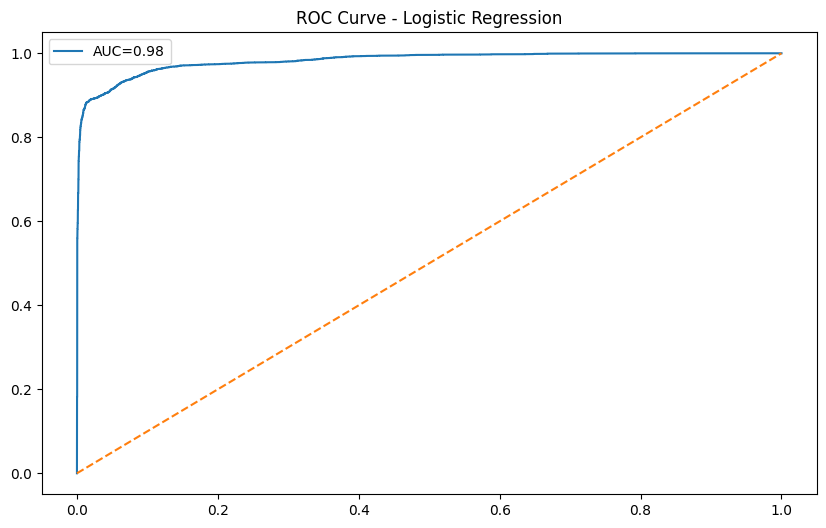

In [ ]:
# Logistic
Logistic_model = LogisticRegression(random_state=42)
Logistic_model.fit(X_train_scaled, y_train)

y_pred_log = Logistic_model.predict(X_test_scaled)
y_prob_log = Logistic_model.predict_proba(X_test_scaled)[:,1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1:", f1_score(y_test, y_pred_log))

# Confusion Matrix
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

plt.plot(fpr_log, tpr_log, label=f"AUC={roc_auc_log:.2f}")
plt.plot([0,1],[0,1],'--')
plt.legend()
plt.title("ROC Curve - Logistic Regression")
plt.show()


### Analysis of Supervised Learning:
Random Forest and XGBoost achieved excellent performance with accuracy and F1-score above 0.998, meaning they correctly classify almost all samples.
Logistic Regression performed well (accuracy ~0.93) but is less effective for complex patterns in the data.
Overall, tree-based models handle non-linear relationships better, which is why they outperform Logistic Regression.

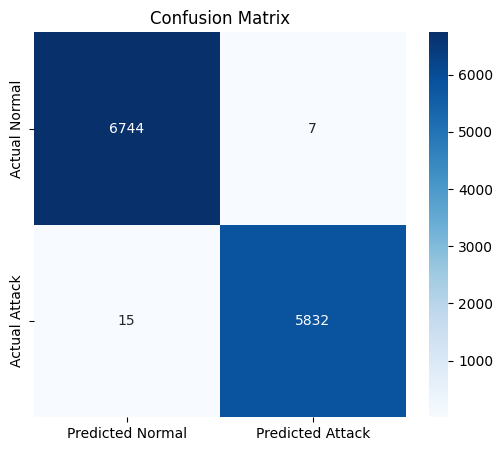

In [68]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Attack'],
            yticklabels=['Actual Normal', 'Actual Attack'])

plt.title("Confusion Matrix")
plt.show()


### Analysis
Most samples are predicted as normal and fewer as attack, reflecting the dataset’s class balance and showing that the model captures the distribution of attack types correctly. And tere are less number of false positives and negatives.
Overall, the model demonstrates strong detection capability with high reliability.